# 21DS706 Deep Learning for Visual Recognition

# Assignment -1 – Evaluation -1

## Task 1

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

Original image


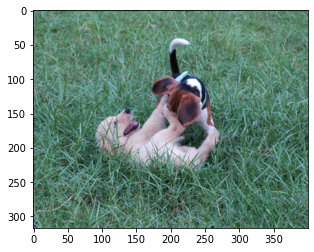

In [ ]:
# loading image

from PIL import Image

img = Image.open('/content/23445819_3a458716c1.jpg')

print("Original image")
plt.imshow(img)

In [ ]:
# function to perform convolution

def stride_conv(arr1,filter): # arr1 --> matrix of an image (3D matrix)
      feat_map = [] 
      
      for i in range(0,arr1.shape[0]-2): # sliding along rows

          for j in range(0,arr1.shape[0]-2): # sliding along columns

            ans = np.sum(np.multiply(arr1[i : i+3, j : j+3], filter)) # convolution operation
            feat_map.append(ans) 
            
      feat_map = np.array(feat_map)
      feat_map = feat_map.reshape((arr1.shape[1]-filter.shape[1]+1, arr1.shape[1]-filter.shape[1]+1)) # reshaping feature map
      return feat_map

In [ ]:

""" 
In this function:
        1. it considers 1st filter from N filters
        2. using this filter, it makes stride_conv function call to perform convolution and returns a feature map 
        3. feature map is printed 
        4. and it repeats for other filters from N filters

"""

def conv(filters):

 feature_map = []
 for i in range(len(filter)):

   feat_map = stride_conv(ar,filter[i])
   print(f"Feature map from filter:{i+1}\n",feat_map)
   print("\n")
   feature_map.append(feat_map)

 feature_map = np.array(feature_map) # size of feature map
 print("Size of feature map is",feature_map.shape[1],"*",feature_map.shape[2],"*",feature_map.shape[0])

In [ ]:
ar = np.array(img) # converting image to matrix
ar.resize((254,254,3)) # resizing an image

# filters 
filter1 = np.array([[[-1, 0, 1],
                    [1, 0, 0],
                    [1, 1, 0]],

                    [[0, 2, 0],
                     [0, 0, 0],
                     [0, 0, 0]],
                    
                    [[5, -1, 0],
                     [-1, 5, -1],
                     [0, -1, 0]]])

filter2 = np.array([[[3, 1, 1],
                    [5, 1, 0],
                    [1, 4, 0]],

                    [[10, 2, 0],
                     [1, 6, 0],
                     [3, 5, 0]],
                    
                    [[0, -1, 0],
                     [-1, 5, -1],
                     [0, -1, 0]]])

filter = [filter1, filter2]

conv(filter) # function call


Feature map from filter:1
 [[1320 1315 1373 ... 1313 1321 1326]
 [1190 1262 1285 ... 1279 1231 1242]
 [1382 1336 1374 ... 1349 1324 1250]
 ...
 [ 983 1102 1038 ... 1036 1147  941]
 [1171 1225 1010 ... 1234 1769 1842]
 [ 816  765  893 ... 1794 1749 1616]]


Feature map from filter:2
 [[4593 4766 5334 ... 5281 5380 5489]
 [5190 5319 5534 ... 5155 5232 5150]
 [4937 5035 5089 ... 4632 4564 4642]
 ...
 [4279 4219 3927 ... 3664 3687 3733]
 [4289 4105 3488 ... 3725 3857 3670]
 [4333 4270 3455 ... 6059 7068 6628]]


Size of feature map is 252 * 252 * 2


## Task 2

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
from tqdm import tqdm 
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
import keras
from keras.applications.vgg16 import VGG16 
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential, Model 
from keras.initializers import he_normal
from keras.layers import Lambda, SeparableConv2D, BatchNormalization, Dropout, MaxPooling2D, Input, Dense, Conv2D, Activation, Flatten 
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

### Initially image was resized to (256,256). Since the dataset we considered for classification had larger no of images, colab resulted in memory error. Hence image size was resized to (120,120).

In [ ]:
class_names = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'] # class labels
nb_classes = len(class_names) # no.of classes
image_size = (120,120) # resizing image 

### The function load_data():
###  1. Assigns label for each images
###  2. Converts image to matrix
###  3. Resize an image to (120,120)
###  4. Appends image and their label to empty lists
###  5. converts image and label list to array
###  6. Returns image and label array


In [ ]:
def load_data():
    
    datasets = ['/content/drive/MyDrive/Colab Notebooks/blood cell/TRAIN', '/content/drive/MyDrive/Colab Notebooks/blood cell/TEST']
    images = []
    labels = []

    # iterate through training and test sets
    count =0
    for dataset in datasets:

        # iterate through folders in each dataset
        for folder in os.listdir(dataset):

            if folder in ['EOSINOPHIL']: label = 0
            elif folder in ['LYMPHOCYTE']: label = 1
            elif folder in ['MONOCYTE']: label = 2
            elif folder in ['NEUTROPHIL']: label = 3

            # iterate through each image in folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # get pathname of each image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open 
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, image_size)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    return images, labels

In [ ]:
images, labels = load_data()

100%|██████████| 624/624 [00:09<00:00, 67.99it/s] 


### Train Test Validation split
### 70% Training, 15% Testing and 15% Validation data

In [ ]:
images, labels = shuffle(images, labels, random_state=10)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.3, random_state = 1)
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size = 0.5, random_state = 1)

In [ ]:
n_train = train_labels.shape[0]
n_val = val_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of validation examples: {}".format(n_val))
print("Number of testing examples: {}".format(n_test))

print("Training images are of shape: {}".format(train_images.shape))
print("Training labels are of shape: {}".format(train_labels.shape))
print("Validation images are of shape: {}".format(val_images.shape))
print("Validation labels are of shape: {}".format(val_labels.shape))
print("Test images are of shape: {}".format(test_images.shape))
print("Test labels are of shape: {}".format(test_labels.shape))

Number of training examples: 8710
Number of validation examples: 1867
Number of testing examples: 1867
Training images are of shape: (8710, 120, 120, 3)
Training labels are of shape: (8710,)
Validation images are of shape: (1867, 120, 120, 3)
Validation labels are of shape: (1867,)
Test images are of shape: (1867, 120, 120, 3)
Test labels are of shape: (1867,)


### Normalizing image matrix 
### Divide train, test and validation images by 255

In [ ]:
train_images = train_images / 255.0 
val_images = val_images / 255.0
test_images = test_images / 255.0

# Building CNN architecture
### Two convolution layers were used
### *1. In 1st convolution layer, 16 kernels were used, each of size 3x3 with activation function as relu. Then, maxpooling layer was used of size (2,2)*
### *2. In 2nd convolution layer, 32 kernels were used, each of size 3x3 with activation function as relu. Then, maxpooling layer was used of size (2,2)*
### *3. after 2nd convolution layer feature maps were flattened*
### *4. two fully connected layers were used, with activation function as relu*
### *5. output layer have 4 neurons (as no of class labels = 4) with softmax as activation function*


# Experimentation
### The earlier CNN architecture resulted in overfitting, with training accuracy of 97% and testing accuracy of 70%. To avoid overfitting following methods were used:
###  *1. adding dropout layer after FC layer. This method haven't solved overfitting, train accuracy = 97% and test accuracy = 67%*
###  *2. adding dropout layer after 1st convolution layer. This method performed well compared to above method, but still there is overfitting (train = 97%, test = 77%)*
###  *3. adding dropout layer at end of 1st convolution layer and also at the end of FC layer. This method improved test accuracy compared to previous methods (Train = 97%, Test = 80.8%)*

### Out of these, adding dropout layer at end of 1st convolution layer and FC layer improved accuracy to some extent. Hence, these changes are made into earlier CNN architecture

In [ ]:
model = Sequential()

# First Conv Layer
model.add(Conv2D(16 , (3,3) , activation = 'relu' , input_shape = (120,120,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

# Second Conv Layer
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# FC layer
model.add(Flatten())
model.add(Dense(units = 64 , activation = 'relu'))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units = 4 , activation = 'softmax'))

# Compile
model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

# Train
history1 = model.fit(
    train_images, 
    train_labels, 
    batch_size = 16, 
    epochs = 20, 
    validation_data=(val_images, val_labels))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 59, 59, 16)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 59, 59, 16)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 57, 57, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 28, 28, 32)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 25088)            

# Model Summary
*   Feeding image of size (120, 120) as input to 1st convolution layer. No of filter used in this layer is 16, each of size 3x3x3 (depth of filter = 3, since we have 3 chnnels in input image). Hence no of learnable parameter in this layer = 16 x 3 x 3 x 3 + 16 = 448. Output shape = ((W + 2p -f)/S + 1, (H + 2p -f)/S + 1) = ((120 + 0 - 3) + 1, (120 + 0 - 3) + 1) = (118, 118, 16), 16 refers to no of filters
*   For MaxPooling layer parameters learnt = 0. Output shape = ((118-2)/2 + 1, (118-2)/2 + 1, 16) = (59, 59, 16)
*   For dropout layer, shape remains same and parameters learnt = 0
*   Now, output of MaxPooling layer is input to 2nd convolution layer. In this layer no of filters used = 32, each of size 3x3x16 (depth = 16, as feature map from previous convolution layer have depth of 16). So no of parameters learnt = 32 x 3 x 3 x 16 + 32 = 4640. Output shape = (59-3+1, 59-3+1, 32) = (57, 57, 32), 32 refers to no of filters
*   For MaxPooling layer parameters learnt = 0. Output shape = ((57-2)/2 + 1, (57-2)/2 + 1, 32) = (28, 28, 32)
*   In Flatten layer, feature map from 2nd convolution layer is vectorized. So, vector length = 28 x 28x 32 = 25088
*   Now, this vector is passes as input to Fully Connected layer, it have 64 neurons. So, parameters learnt = 25088 x 64 + 64 = 1605696 and output vector is of length 64
*   Output of 1st FC layer is input to 2nd FC layer and neurons in this layer is 32. So, no of parameters learnt = 64 x 32 + 32 = 2080 and ouput vector is of size 32
*   For dropout layer parameters learnt = 0 and output vector is of length 32
*   Output of 2nd FC layer is input to output layer and no of neurons = 4. So, no of parameters learnt = 32 x 4 + 4 = 132 and output vector is of length 4, each element represents probability of class labels and location of highest probability is considered as label for an image
*   Total learnable parameters = 448 + 4640 + 1605696 + 2080 + 132 = 1,612,996













In [ ]:
# function to plot Train and Validation Accuracy Vs number of epochs and Train and Validation loss Vs number of epochs
def plot_accuracy_loss_chart(history, n):
    epochs = [i for i in range(n)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(20,10)
    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

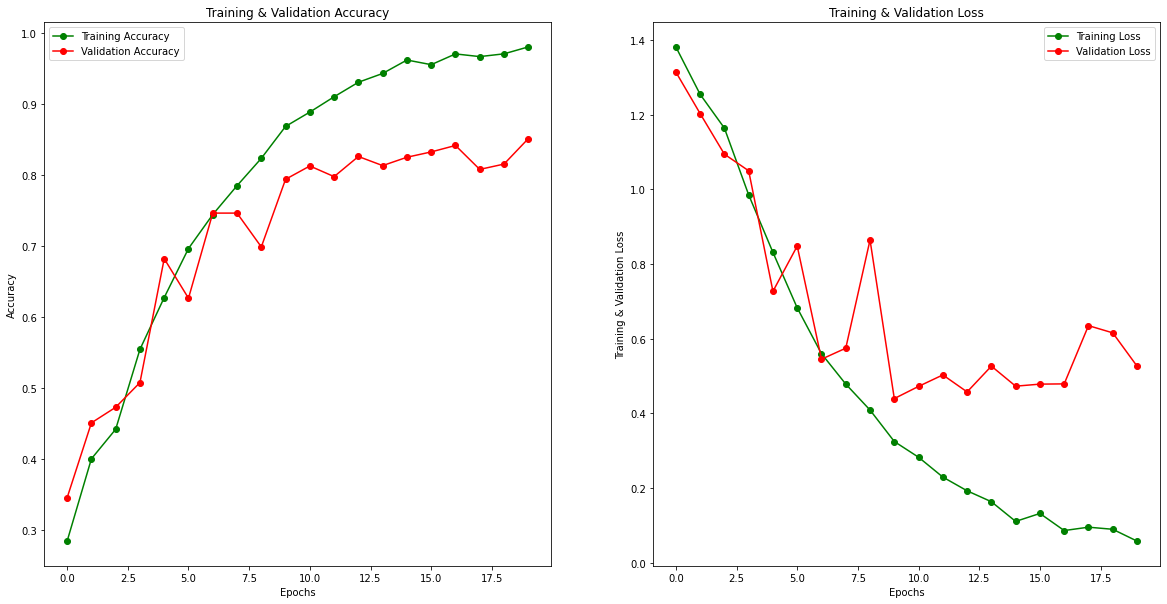

In [ ]:
plot_accuracy_loss_chart(history1, 20)

# Train & Validation accuracy Vs Epochs
*   X-axis -> epochs, Y-axis -> Accuracy. 
*   As Epochs increases, training accuracy increases and validation accuracy also increases. But at the end of 20 epochs, the model that we built, have higher training accuracy (97%) but validation accuracy is somewhat low and it is comparable to train accuracy (85.8%). We can see little overfitting in our model. 

# Train & Validation loss Vs Epochs
*   X-axis -> epochs, Y-axis -> loss.
*   As Epochs increases, training loss decreases and validation loss also decreases. But at the end of 20 epochs, the model that we built, have lower training loss compared to validation loss. 



In [ ]:
print("Test result")
results = model.evaluate(test_images, test_labels)

print("Loss of the model  is - test ", results[0])
print("Accuracy of the model is - test", results[1]*100, "%")

print("\nval result")
results = model.evaluate(val_images, val_labels)

print("Loss of the model  is - val ", results[0])
print("Accuracy of the model is - val", results[1]*100, "%")

print("\ntrain result")
results = model.evaluate(train_images, train_labels)

print("Loss of the model  is - train ", results[0])
print("Accuracy of the model is - train", results[1]*100, "%")

Test result
59/59 [==============================] - 6s 107ms/step - loss: 0.7089 - accuracy: 0.8082
Loss of the model  is - test  0.7088984847068787
Accuracy of the model is - test 80.8248519897461 %

val result
59/59 [==============================] - 6s 94ms/step - loss: 0.5269 - accuracy: 0.8511
Loss of the model  is - val  0.5268520712852478
Accuracy of the model is - val 85.10980010032654 %

train result
273/273 [==============================] - 26s 96ms/step - loss: 0.0170 - accuracy: 0.9955
Loss of the model  is - train  0.01696183905005455
Accuracy of the model is - train 99.55223798751831 %


In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(test_images)
predictions = np.argmax(predictions,axis=1)
predictions[:15]

array([0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 3, 1, 2, 0, 0])

In [ ]:
print(classification_report(
    test_labels, 
    predictions, 
    target_names = ['EOSINOPHIL (Class 0)', 'LYMPHOCYTE (Class 1)', 'MONOCYTE (Class 2)', 'NEUTROPHIL (Class 3)']))

                      precision    recall  f1-score   support

EOSINOPHIL (Class 0)       0.70      0.77      0.73       460
LYMPHOCYTE (Class 1)       0.93      0.91      0.92       458
  MONOCYTE (Class 2)       0.91      0.89      0.90       461
NEUTROPHIL (Class 3)       0.71      0.68      0.70       488

            accuracy                           0.81      1867
           macro avg       0.81      0.81      0.81      1867
        weighted avg       0.81      0.81      0.81      1867



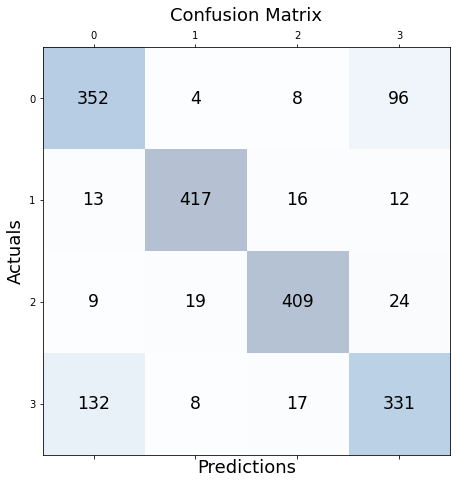

In [ ]:
import sklearn
conf_matrix = sklearn.metrics.confusion_matrix(y_true=test_labels, y_pred=predictions)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Confusion Matrix

1. Total images of EOSINOPHIL (Class 0) = 460
Out of 460 images 352 images correctly classified as EOSINOPHIL, 4 misclassified as LYMPHOCYTE, 8 misclassified as MONOCYTE and 96 misclassified as NEUTROPHIL


2. Total images of LYMPHOCYTE (Class 1) = 458
Out of 458 images 417 images correctly classified as LYMPHOCYTE, 13 misclassified as EOSINOPHIL, 16 misclassified as MONOCYTE and 12 misclassified as NEUTROPHIL


3. Total images of MONOCYTE (Class 2) = 461
Out of 461 images 409 images correctly classified as MONOCYTE, 9 misclassified as EOSINOPHIL, 19 misclassified as LYMPHOCYTE and 24 misclassified as NEUTROPHIL


4. Total images of NEUTROPHIL (Class 3) = 488
Out of 488 images 331 images correctly classified as NEUTROPHIL, 132 misclassified as EOSINOPHIL, 8 misclassified as LYMPHOCYTE and 17 misclassified as MONOCYTE

# Accuracy of each class
* Accuracy of EOSINOPHIL (Class 0) = 352/460 = 76.52%
* Accuracy of LYMPHOCYTE (Class 1) = 417/458 = 91.04%
* Accuracy of MONOCYTE (Class 2) = 409/461 = 88.7%
* Accuracy of NEUTROPHIL (Class 3) = 331/488 = 67.82%